# MetroBike Data Relationships

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [74]:
# import dataset
bikes = pd.read_csv(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 6\Austin Bikes\Short Trips Merge.csv')

In [4]:
# check bike table
bikes.head()

,Unnamed: 0,Trip ID,Membership or Pass Type,Bicycle ID,Bike Type,Checkout Datetime,Checkout Date,Checkout Time,Checkout Kiosk ID,Checkout Kiosk,...,Trip Duration Minutes,Month,Year,Return Kiosk ID,Return Kiosk,Return Kiosk Status,Return Location,Return City Asset Number,Return Number of Docks,Return Council District
0,0,16459203,Local365,37,classic,2017-12-01 09:51:41,2017-12-01,09:51:41,2496,8th & Congress,...,3,12,2017,2495,4th & Congress,active,"(30.26634, -97.74378)",16726.0,15.0,9.0
1,1,4106422,Local365,971,classic,2015-03-13 16:20:24,2015-03-13,16:20:24,2495,4th/Congress,...,14,3,2015,2495,4th/Congress,active,"(30.26634, -97.74378)",16726.0,15.0,9.0
2,2,3454605,Local365,29,classic,2014-10-14 08:33:54,2014-10-14,08:33:54,2712,Toomey Rd @ South Lamar,...,22,10,2014,2575,Riverside/South Lamar,active,"(30.26446, -97.75665)",16736.0,15.0,5.0
3,3,3454592,Local365,646,classic,2014-10-14 08:32:03,2014-10-14,08:32:03,2552,3rd/West,...,29,10,2014,2496,8th/Congress,active,"(30.2698, -97.74186)",16725.0,14.0,9.0
4,4,4106421,24 Hour Walk Up Pass,124,classic,2015-03-13 16:20:15,2015-03-13,16:20:15,2498,Dean Keeton/Speedway,...,10,3,2015,2549,South 1st/Riverside @ Long Center,active,"(30.25941, -97.74971)",16750.0,13.0,9.0


In [5]:
# list bike table columns
bikes.columns

Index(['Unnamed: 0', 'Trip ID', 'Membership or Pass Type', 'Bicycle ID',
       'Bike Type', 'Checkout Datetime', 'Checkout Date', 'Checkout Time',
       'Checkout Kiosk ID', 'Checkout Kiosk', 'Checkout Kiosk Status',
       'Checkout Location', 'Checkout City Asset Number',
       'Checkout Number of Docks', 'Checkout Council District',
       'Trip Duration Minutes', 'Month', 'Year', 'Return Kiosk ID',
       'Return Kiosk', 'Return Kiosk Status', 'Return Location',
       'Return City Asset Number', 'Return Number of Docks',
       'Return Council District'],
      dtype='object')

In [75]:
# rename some bike table columns
bikes.rename(columns = {'Membership or Pass Type' : 'Pass Type', 'Checkout Number of Docks' : 'Checkout Dock #', 'Trip Duration Minutes' : 'Trip Length', 'Return Number of Docks' : 'Return Dock #'}, inplace = True)

# check bike table columns
bikes.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Trip ID', 'Pass Type', 'Bicycle ID',
       'Bike Type', 'Checkout Datetime', 'Checkout Date', 'Checkout Time',
       'Checkout Kiosk ID', 'Checkout Kiosk', 'Checkout Kiosk Status',
       'Checkout Location', 'Checkout City Asset Number', 'Checkout Dock #',
       'Checkout Council District', 'Trip Length', 'Month', 'Year',
       'Return Kiosk ID', 'Return Kiosk', 'Return Kiosk Status',
       'Return Location', 'Return City Asset Number', 'Return Dock #',
       'Return Council District'],
      dtype='object')

In [76]:
# create data sub with wanted variables for analysis
suba = bikes[['Pass Type', 'Bike Type', 'Checkout Date', 'Checkout Time', 'Checkout Location', 'Checkout Dock #', 'Trip Length', 'Month', 'Year', 'Return Location', 'Return Dock #']]

# check subset columns
suba.columns

Index(['Pass Type', 'Bike Type', 'Checkout Date', 'Checkout Time',
       'Checkout Location', 'Checkout Dock #', 'Trip Length', 'Month', 'Year',
       'Return Location', 'Return Dock #'],
      dtype='object')

In [63]:
suba.dtypes

Pass Type             object
Bike Type             object
Checkout Date         object
Checkout Time         object
Checkout Location     object
Checkout Dock #      float64
Trip Length            int64
Month                  int64
Year                   int64
Return Location       object
Return Dock #        float64
dtype: object

In [77]:
# select only numerical data
suba_num = suba.select_dtypes(include=['float64', 'int64'])

# create correlation matrix
suba_num.corr()

#The correlation table shows that no two variables have an absolute correlation coefficient above 0.3. 
#These variables are not linearly correlated.

,Checkout Dock #,Trip Length,Month,Year,Return Dock #
Checkout Dock #,1.000000,-0.100946,0.026036,0.120441,0.271896
Trip Length,-0.100946,1.000000,-0.033279,-0.080973,-0.132562
Month,0.026036,-0.033279,1.000000,0.035950,0.027556
Year,0.120441,-0.080973,0.035950,1.000000,0.127715
Return Dock #,0.271896,-0.132562,0.027556,0.127715,1.000000


In [78]:
suba_num.corr().to_clipboard()

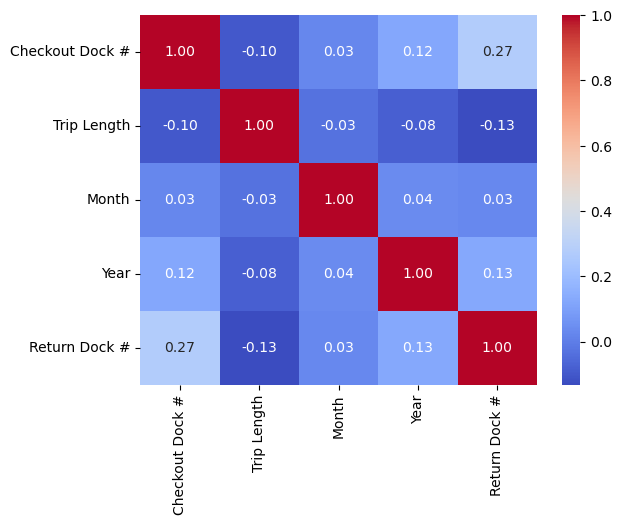

In [79]:
# create a correlation heatmap
suba_corr = suba_num.corr()
sns.heatmap(suba_corr, annot=True, fmt=".2f", cmap='coolwarm')

# save the heatmap
plt.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 6\MetroBike Analysis Figures\Heat Map.png', bbox_inches='tight')

#The correlation heatmap shows that no two variables have an absolute correlation coefficient above 0.3. 
#These variables are not linearly correlated.

In [80]:
# create a table with variables with significant correlation values
corr_pairs = []
for i in range(len(suba_corr.columns)):
    for j in range(i):
        if abs(suba_corr.iloc[i, j]) > 0.3:
                        corr_pairs.append((suba_corr.columns[i], suba_corr.columns[j], suba_corr.iloc[i, j]))
                
corr_pairs_df = pd.DataFrame(corr_pairs, columns=['Variable 1', 'Variable 2', 'Correlation'])

In [81]:
corr_pairs_df

# None of these variables are linearly correlated

,Variable 1,Variable 2,Correlation


C:\Users\kacie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


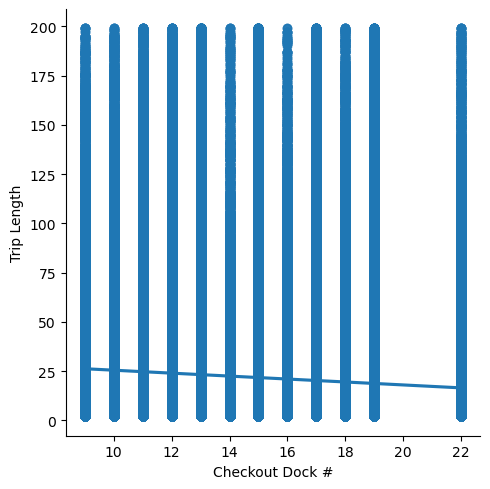

In [82]:
# create scatterplot for trip length vs # of docks at a checkout kiosk
sns.lmplot(x = 'Checkout Dock #', y = 'Trip Length', data = bikes)
plt.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 6\MetroBike Analysis Figures\Length CO Dock.png')

# there is no obvious correlation between trip length and the number of docks at a checkout kiosk

C:\Users\kacie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


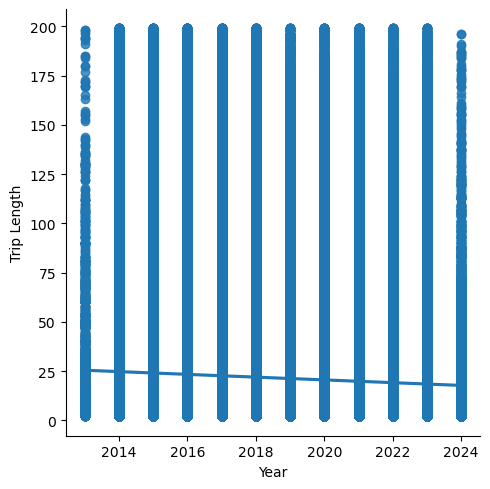

In [83]:
# create scatterplot for trip length vs year
sns.lmplot(x = 'Year', y = 'Trip Length', data = bikes)
plt.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 6\MetroBike Analysis Figures\Length Year.png')

# there is no obvious correlation between trip length and year

C:\Users\kacie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


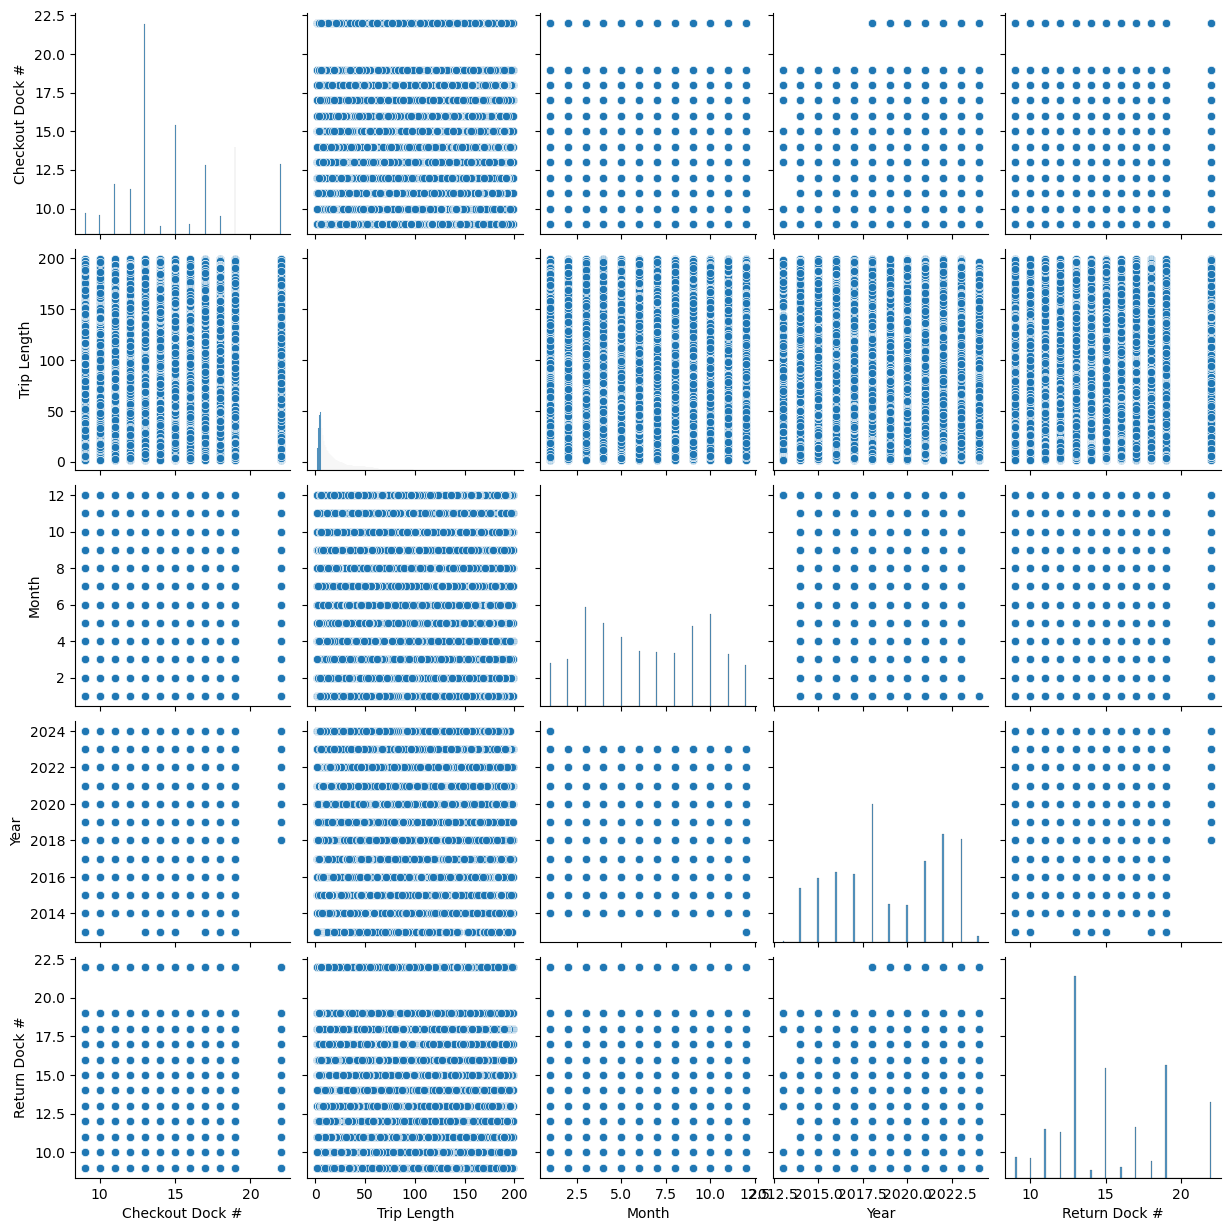

In [84]:
# create a pair plot 
sns.pairplot(suba_num)
plt.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 6\MetroBike Analysis Figures\Pair Plot.png')

# the pair plot histograms are interesting, especially for trip length, month, and year. 
# the pair plot scatterplots do not uncover interesting relationships

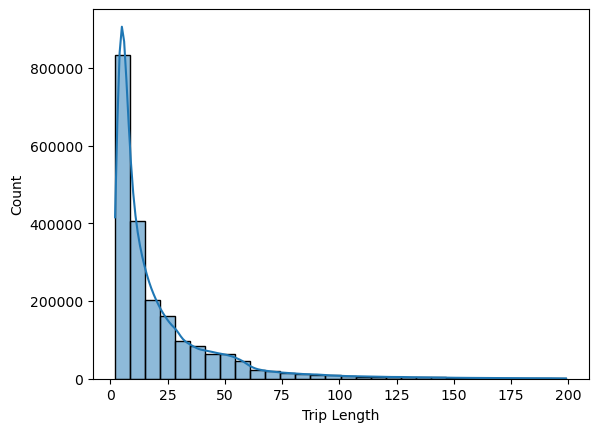

In [85]:
# create a histogram of trip lengths
length_hist = sns.histplot(bikes['Trip Length'], bins=30, kde = True)

# shorter trip lengths are the most common.
# there are a higher number of trips than expected around 50 minutes. 

In [163]:
# create a table with counts for membership for the most used passes
pass_counts = bikes.groupby('Pass Type')['Trip ID'].count().reset_index(name='Number of Rides')
pass_use = pass_counts[pass_counts['Number of Rides'] > 7000]
print(pass_use)

                        Pass Type  Number of Rides
2            24 Hour Walk Up Pass           267694
4                 3-Day Weekender            50199
20                       Explorer            99609
27                        Local30            55339
29                        Local31           139469
30                       Local365           370196
35            Local365+Guest Pass            13883
41                Pay-as-you-ride            68527
49                   Single Trip             11231
50  Single Trip (Pay-as-you-ride)            34281
52             Student Membership           352563
54        U.T. Student Membership           285462
56                        Walk Up           254507
57                      Weekender            40186


In [167]:
# create pass use category
pass_use.loc[pass_use['Number of Rides'] > 150000, 'Pass Use'] = 'High Use' 
pass_use.loc[(pass_use['Number of Rides'] > 50000) & (pass_use['Number of Rides'] <= 150000), 'Pass Use'] = 'Middle Use' 
pass_use.loc[pass_use['Number of Rides'] <= 50000, 'Pass Use'] = 'Low Use' 
print(pass_use)

                        Pass Type  Number of Rides    Pass Use
2            24 Hour Walk Up Pass           267694    High Use
4                 3-Day Weekender            50199  Middle Use
20                       Explorer            99609  Middle Use
27                        Local30            55339  Middle Use
29                        Local31           139469  Middle Use
30                       Local365           370196    High Use
35            Local365+Guest Pass            13883     Low Use
41                Pay-as-you-ride            68527  Middle Use
49                   Single Trip             11231     Low Use
50  Single Trip (Pay-as-you-ride)            34281     Low Use
52             Student Membership           352563    High Use
54        U.T. Student Membership           285462    High Use
56                        Walk Up           254507    High Use
57                      Weekender            40186     Low Use


C:\Users\kacie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


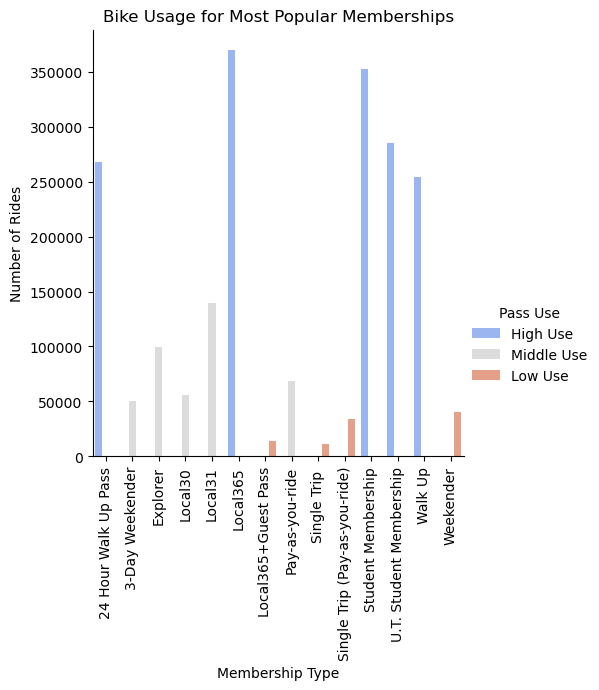

In [171]:
# plot ride count for pass type
sns.catplot(x='Pass Type', y='Number of Rides', kind='bar', data=pass_use, hue='Pass Use', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Bike Usage for Most Popular Memberships')
plt.ylabel('Number of Rides')
plt.xlabel('Membership Type')
plt.show()

# the most popular passes are: 24 Hour Walk Up Pass, Local36, Student Membership, U.T. Student Membership, and Walk Up 

In [152]:
# create a table with counts per month
month_counts = bikes.groupby('Month')['Trip ID'].count().reset_index(name='Number of Rides')
print(month_counts)

    Month  Number of Rides
0       1           116074
1       2           129263
2       3           269383
3       4           225989
4       5           186975
5       6           149029
6       7           146429
7       8           145666
8       9           218568
9      10           251797
10     11           141702
11     12           111125


In [158]:
# create month use category
month_counts.loc[month_counts['Number of Rides'] > 250000, 'Monthly Activity'] = 'Peak Months' 
month_counts.loc[(month_counts['Number of Rides'] > 120000) & (month_counts['Number of Rides'] <= 250000), 'Monthly Activity'] = 'Average Months' 
month_counts.loc[month_counts['Number of Rides'] <= 120000, 'Monthly Activity'] = 'Slowest Months' 
print(month_counts)

    Month  Number of Rides  Month Activity Monthly Activity
0       1           116074     Slow Months   Slowest Months
1       2           129263  Average Months   Average Months
2       3           269383     Peak Months      Peak Months
3       4           225989  Average Months   Average Months
4       5           186975  Average Months   Average Months
5       6           149029  Average Months   Average Months
6       7           146429  Average Months   Average Months
7       8           145666  Average Months   Average Months
8       9           218568  Average Months   Average Months
9      10           251797     Peak Months      Peak Months
10     11           141702  Average Months   Average Months
11     12           111125     Slow Months   Slowest Months


C:\Users\kacie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


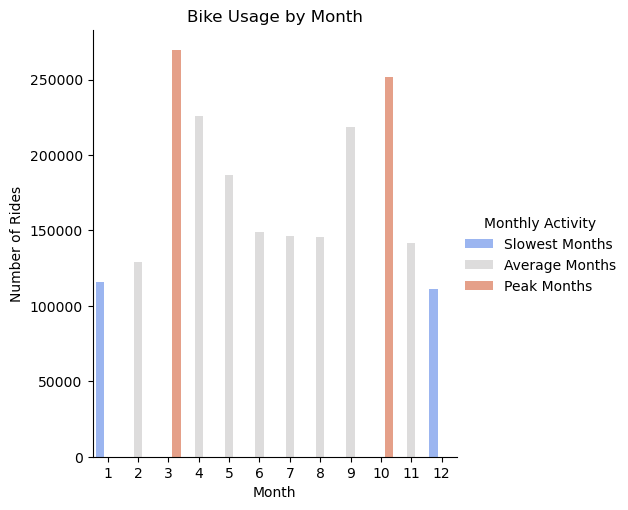

In [173]:
# plot ride count per month
sns.catplot(x='Month', y='Number of Rides', kind='bar', hue='Monthly Activity', palette='coolwarm', data=month_counts)
plt.title('Bike Usage by Month')
plt.ylabel('Number of Rides')
plt.xlabel('Month')
plt.show()

# March and October are the most popular months. December and January are the least popular months

In [154]:
# create a table with counts per year
year_small = bikes[(bikes['Year'] < 2024)&(bikes['Year'] > 2013)]
year_counts = year_small.groupby('Year')['Trip ID'].count().reset_index(name='Number of Rides')
print(year_counts)

   Year  Number of Rides
0  2014           148380
1  2015           174778
2  2016           191848
3  2017           183994
4  2018           376812
5  2019           103832
6  2020            99759
7  2021           220768
8  2022           293523
9  2023           281529


In [156]:
# create month use category
year_counts.loc[year_counts['Number of Rides'] > 370000, 'Yearly Activity'] = 'Peak Year' 
year_counts.loc[(year_counts['Number of Rides'] > 110000) & (year_counts['Number of Rides'] <= 370000), 'Yearly Activity'] = 'Average Years' 
year_counts.loc[year_counts['Number of Rides'] <= 110000, 'Yearly Activity'] = 'Slowest Years' 
print(year_counts)

   Year  Number of Rides Yearly Activity
0  2014           148380   Average Years
1  2015           174778   Average Years
2  2016           191848   Average Years
3  2017           183994   Average Years
4  2018           376812       Peak Year
5  2019           103832   Slowest Years
6  2020            99759   Slowest Years
7  2021           220768   Average Years
8  2022           293523   Average Years
9  2023           281529   Average Years


C:\Users\kacie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


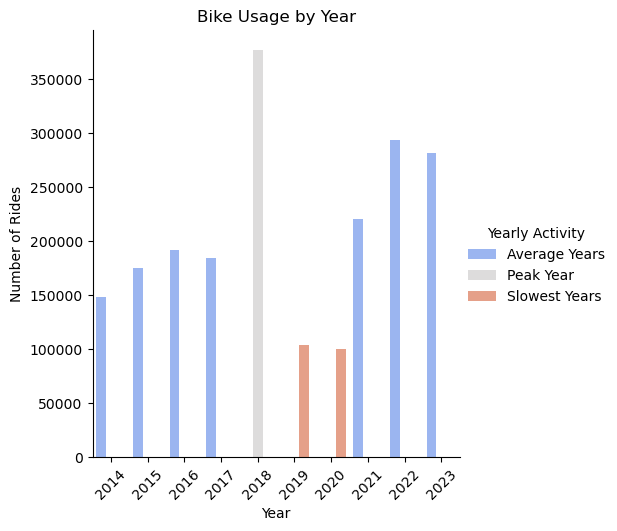

In [172]:
# plot ride count per year
sns.catplot(x='Year', y='Number of Rides', kind='bar', hue='Yearly Activity', palette='coolwarm', data=year_counts)
plt.xticks(rotation=45)
plt.title('Bike Usage by Year')
plt.ylabel('Number of Rides')
plt.xlabel('Year')
plt.show()

# 2018 was the busiest year. 2019 and 2020 were the slowest years. Average use is increasing. 

Text(0.5, 1.0, 'Bike Usage Heatmap')

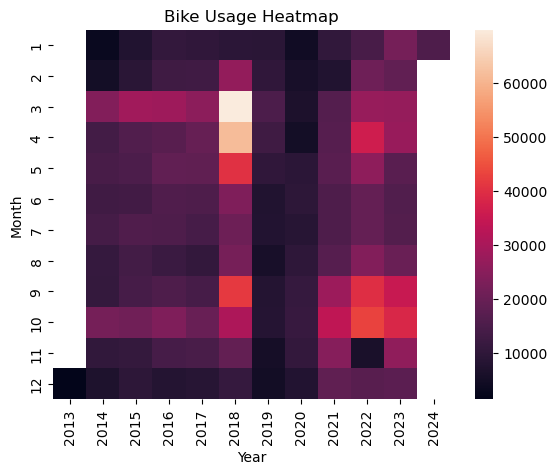

In [183]:
year_pivot = bikes.pivot_table(index='Month', 
                               columns='Year', 
                               values='Trip ID', 
                               aggfunc='count')
sns.heatmap(year_pivot, fmt=".2f")
plt.title('Bike Usage Heatmap')

# March and April of 2018 are the busiest months on record. 